In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
import zipfile
import scipy
import scipy.stats
from scipy.stats import pearsonr

In [35]:
file = zipfile.ZipFile('/content/drive/MyDrive/household_power_consumption.zip', 'r')
file.extractall('data')

**preparing the data**

In [36]:
data = pd.read_csv('/content/data/household_power_consumption.txt', sep = ';', header=0,
                 low_memory=False, infer_datetime_format=True,
                 parse_dates={'datetime':[0,1]}, index_col=['datetime'])

In [37]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [38]:
# point out all missing values
data.replace('?', 'nan', inplace=True) 
# make dataset numeric
data = data.astype('float32')

In [40]:
data.shape

(2075259, 7)

In [41]:
data = data.fillna(data.mean())

**Q11. Which of the following is a plot of the global_active_power over time?**

In [42]:
data_res = data.resample('D').sum()
print(data_res.head())

            Global_active_power  ...  Sub_metering_3
datetime                         ...                
2006-12-16          1209.176025  ...          4926.0
2006-12-17          3390.459961  ...         13341.0
2006-12-18          2203.825928  ...         14018.0
2006-12-19          1666.193970  ...          6197.0
2006-12-20          2225.748047  ...         14063.0

[5 rows x 7 columns]


Text(0.5, 1.0, 'Plot of Global_active_power over time')

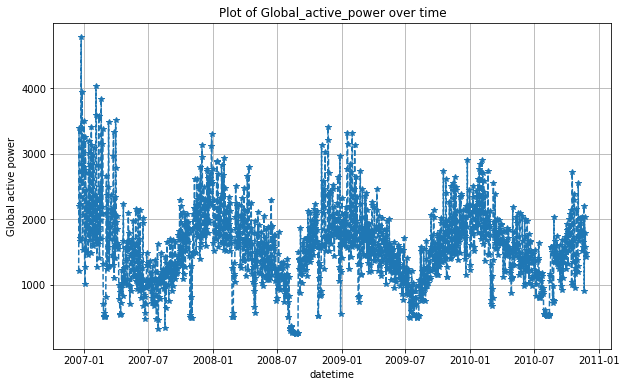

In [43]:
plt.figure(figsize=(10,6))
plt.plot(data_res.index, data_res.Global_active_power, '--', marker='*', )
plt.grid()
plt.xlabel('datetime')
plt.ylabel('Global active power')
plt.title('Plot of Global_active_power over time')

**Q13. What is the Pearson correlation coefficient between the Voltage and global_intensity? 2 decimal places**

In [44]:
corr,_ = pearsonr(data_res.Voltage,data_res.Global_intensity)
corr

0.05221350712869457

**Q14. Use a sampling rate(sum) divide the data into a tran and test set. The last 365 days is your test set and the first (x-365) days is training set.**

**What is the MAPE (in%) in 2 DP**



In [45]:
train_data = data_res.iloc[:1077,:]

In [46]:
train_data.shape

(1077, 7)

In [47]:
test_data = data_res.iloc[1077:,:]

In [48]:
test_data.shape

(365, 7)

In [49]:
from fbprophet import Prophet

In [50]:
train_data.reset_index(inplace = True)
train_data.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176025,34.922001,93552.53125,5180.799805,0.0,546.0,4926.0
1,2006-12-17,3390.459961,226.005997,345725.31250,14398.599609,2033.0,4187.0,13341.0
2,2006-12-18,2203.825928,161.792007,347373.62500,9247.200195,1063.0,2621.0,14018.0
3,2006-12-19,1666.193970,150.942001,348479.00000,7094.000000,839.0,7602.0,6197.0
4,2006-12-20,2225.748047,160.998001,348923.62500,9313.000000,0.0,2648.0,14063.0


In [51]:
df_train = train_data.iloc[:,:2]

In [52]:
df_train = df_train.rename(columns={"datetime": "ds", "Global_active_power": "y"})
df_train.head()

,ds,y
0,2006-12-16,1209.176025
1,2006-12-17,3390.459961
2,2006-12-18,2203.825928
3,2006-12-19,1666.193970
4,2006-12-20,2225.748047


In [53]:
test_data.reset_index(inplace = True)
test_data.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2009-11-27,1380.026001,133.052002,348276.68750,5704.000000,0.0,396.0,11599.0
1,2009-11-28,1858.949951,225.218002,347898.87500,7784.799805,3199.0,386.0,14350.0
2,2009-11-29,1650.962036,191.056000,350364.56250,6878.399902,1073.0,3061.0,7828.0
3,2009-11-30,1745.189941,153.382004,351020.59375,7232.200195,1080.0,361.0,12039.0
4,2009-12-01,1756.378052,141.873993,349391.75000,7312.799805,0.0,354.0,10821.0


In [54]:
df_tests = test_data.iloc[:,:2]

In [55]:
df_tests = df_tests.rename(columns={"datetime": "ds", "Global_active_power": "y"})
df_tests.head()

,ds,y
0,2009-11-27,1380.026001
1,2009-11-28,1858.949951
2,2009-11-29,1650.962036
3,2009-11-30,1745.189941
4,2009-12-01,1756.378052


In [56]:
model = Prophet()
model.fit(df_train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [57]:
forecast = model.predict(df_tests) 
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-11-27,1580.084009,1556.222117,2652.974698,1580.084009,1580.084009,519.056899,519.056899,519.056899,-64.127019,-64.127019,-64.127019,583.183918,583.183918,583.183918,0.0,0.0,0.0,2099.140908
1,2009-11-28,1580.207768,1818.749038,3009.801964,1580.207768,1580.207768,822.213567,822.213567,822.213567,245.813256,245.813256,245.813256,576.400311,576.400311,576.400311,0.0,0.0,0.0,2402.421335
2,2009-11-29,1580.331526,1795.021681,2942.489300,1580.331526,1580.331526,796.157722,796.157722,796.157722,228.519177,228.519177,228.519177,567.638545,567.638545,567.638545,0.0,0.0,0.0,2376.489248
3,2009-11-30,1580.455285,1401.932272,2495.617817,1580.455285,1580.455285,396.118617,396.118617,396.118617,-161.286790,-161.286790,-161.286790,557.405408,557.405408,557.405408,0.0,0.0,0.0,1976.573902
4,2009-12-01,1580.579043,1539.388962,2700.980488,1580.579043,1580.579043,516.895388,516.895388,516.895388,-29.332428,-29.332428,-29.332428,546.227816,546.227816,546.227816,0.0,0.0,0.0,2097.474431


In [58]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].head()
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2009-11-27,2099.140908,1556.222117,2652.974698,1580.084009,1580.084009,1580.084009
1,2009-11-28,2402.421335,1818.749038,3009.801964,1580.207768,1580.207768,1580.207768
2,2009-11-29,2376.489248,1795.021681,2942.489300,1580.331526,1580.331526,1580.331526
3,2009-11-30,1976.573902,1401.932272,2495.617817,1580.455285,1580.455285,1580.455285
4,2009-12-01,2097.474431,1539.388962,2700.980488,1580.579043,1580.579043,1580.579043


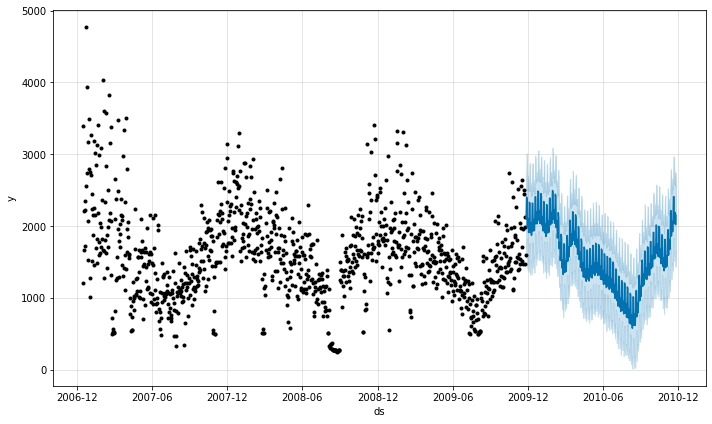

In [59]:
model.plot(forecast)
plt.show()

In [60]:
from sklearn import metrics
def Metric(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100

In [61]:
MAPE = Metric(df_tests['y'],forecast['yhat'])
print(f'the Mean Average Percentage Error ( MAPE) is: {round(MAPE,2)}')

the Mean Average Percentage Error ( MAPE) is: 20.82


**Q15. What is the RMSE in 2 decimal place?**

In [65]:
# RMSE
RMSE = np.sqrt(metrics.mean_squared_error(df_tests['y'],forecast['yhat']))
RMSE
round(RMSE,2)

374.6

**Q16. If you plot the components from the forecasted model, what month of the yearly seasonality has the lowest value?**
Ans : August

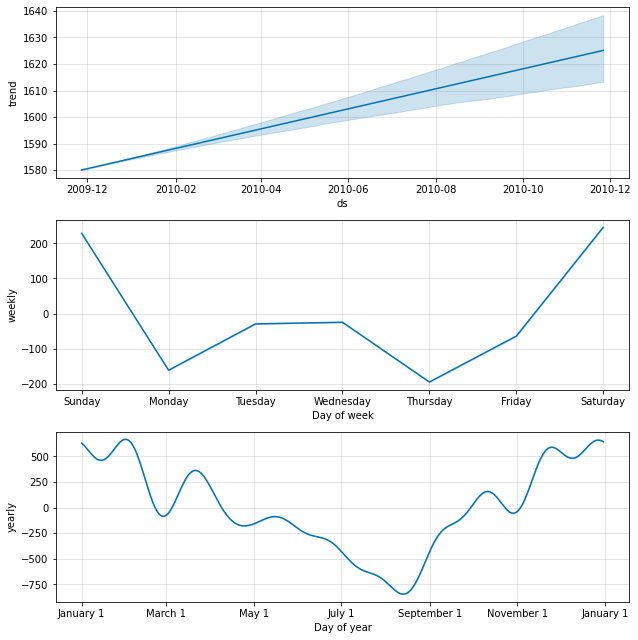

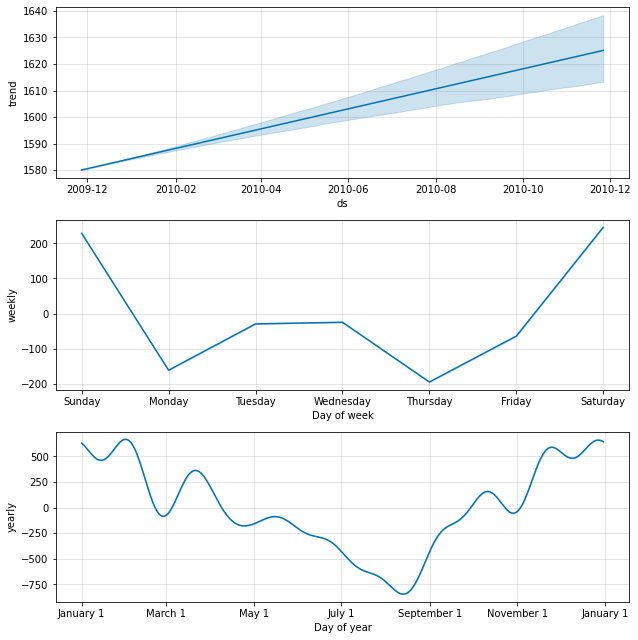

In [66]:
model.plot_components(forecast)


**Q17. Multivariate Time Series Forecasting with Facebook Prophet In the last exercise, we used only the dependent variable (Global_Active_Power) and the time component for our modeling (ds vs y). Next, we will build a time series model using the other variables. Evaluating the results of your time series modeling on the test set, what is the MAPE (in %) in 2 decimal places?**

In [67]:
data_res.reset_index(inplace=True)

In [68]:
data_res.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176025,34.922001,93552.53125,5180.799805,0.0,546.0,4926.0
1,2006-12-17,3390.459961,226.005997,345725.31250,14398.599609,2033.0,4187.0,13341.0
2,2006-12-18,2203.825928,161.792007,347373.62500,9247.200195,1063.0,2621.0,14018.0
3,2006-12-19,1666.193970,150.942001,348479.00000,7094.000000,839.0,7602.0,6197.0
4,2006-12-20,2225.748047,160.998001,348923.62500,9313.000000,0.0,2648.0,14063.0


In [69]:
new_data_res = data_res.rename(columns = {'datetime':'ds','Global_active_power':'y',
                                           'Global_reactive_power':'add1','Voltage':'add2',
                                           'Global_intensity':'add3','Sub_metering_1':'add4',
                                          'Sub_metering_2':'add5','Sub_metering_3':'add6'})
new_data_res.head()

,ds,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,1209.176025,34.922001,93552.53125,5180.799805,0.0,546.0,4926.0
1,2006-12-17,3390.459961,226.005997,345725.31250,14398.599609,2033.0,4187.0,13341.0
2,2006-12-18,2203.825928,161.792007,347373.62500,9247.200195,1063.0,2621.0,14018.0
3,2006-12-19,1666.193970,150.942001,348479.00000,7094.000000,839.0,7602.0,6197.0
4,2006-12-20,2225.748047,160.998001,348923.62500,9313.000000,0.0,2648.0,14063.0


In [70]:
new_train = new_data_res.iloc[:1077,:]
new_test = new_data_res.iloc[1077:,:]

In [71]:
model = Prophet(daily_seasonality=True)
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')
model.add_regressor('add4')
model.add_regressor('add5')
model.add_regressor('add6')

model = model.fit(new_train)
new_forecast = model.predict(new_test)
new_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,add2_lower,add2_upper,add3,add3_lower,add3_upper,add4,add4_lower,add4_upper,add5,add5_lower,add5_upper,add6,add6_lower,add6_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-11-27,1310.545634,1365.223411,1396.702794,1310.545634,1310.545634,7.518641,7.518641,7.518641,0.611811,0.611811,0.611811,-232.332569,-232.332569,-232.332569,2.212554,2.212554,2.212554,0.821183,0.821183,0.821183,3.847123,3.847123,3.847123,70.432793,70.432793,70.432793,284.757745,284.757745,284.757745,-217.321258,-217.321258,-217.321258,-0.103529,-0.103529,-0.103529,3.099835,3.099835,3.099835,0.0,0.0,0.0,1380.978427
1,2009-11-28,1310.665825,1845.164422,1876.706470,1310.665825,1310.665825,-8.859759,-8.859759,-8.859759,0.502363,0.502363,0.502363,263.404254,263.404254,263.404254,-2.037390,-2.037390,-2.037390,0.826436,0.826436,0.826436,7.716037,7.716037,7.716037,551.138604,551.138604,551.138604,284.757745,284.757745,284.757745,261.551942,261.551942,261.551942,1.400178,1.400178,1.400178,3.428739,3.428739,3.428739,0.0,0.0,0.0,1861.804429
2,2009-11-29,1310.786015,1628.953780,1661.234316,1310.786015,1310.786015,-2.788985,-2.788985,-2.788985,1.216642,1.216642,1.216642,47.460461,47.460461,47.460461,0.787049,0.787049,0.787049,-0.578626,-0.578626,-0.578626,-1.456286,-1.456286,-1.456286,333.335649,333.335649,333.335649,284.757745,284.757745,284.757745,44.640255,44.640255,44.640255,0.144315,0.144315,0.144315,3.793334,3.793334,3.793334,0.0,0.0,0.0,1644.121664
3,2009-11-30,1310.906205,1727.549488,1759.082540,1310.906205,1310.906205,3.905889,3.905889,3.905889,1.406686,1.406686,1.406686,131.751041,131.751041,131.751041,0.777749,0.777749,0.777749,0.839567,0.839567,0.839567,4.465924,4.465924,4.465924,431.766358,431.766358,431.766358,284.757745,284.757745,284.757745,143.146856,143.146856,143.146856,-0.336567,-0.336567,-0.336567,4.198325,4.198325,4.198325,0.0,0.0,0.0,1742.672564
4,2009-12-01,1311.026396,1746.036441,1778.974165,1311.026396,1311.026396,5.950925,5.950925,5.950925,0.934830,0.934830,0.934830,150.953373,150.953373,150.953373,2.212554,2.212554,2.212554,0.843244,0.843244,0.843244,2.752970,2.752970,2.752970,451.391337,451.391337,451.391337,284.757745,284.757745,284.757745,163.647896,163.647896,163.647896,-1.661897,-1.661897,-1.661897,4.647592,4.647592,4.647592,0.0,0.0,0.0,1762.417732


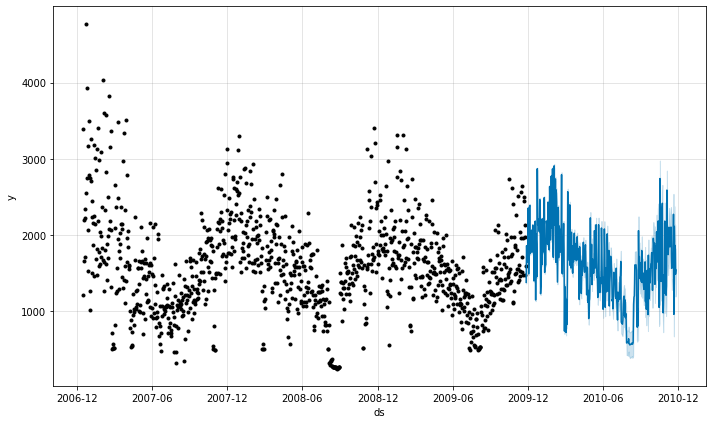

In [72]:
model.plot(new_forecast)
plt.show()

In [73]:
def Metric(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100

MAPE = Metric(new_test['y'],new_forecast['yhat'])
round(MAPE,2)

2.61

**Q18. What is the RMSE in 2 decimal place?**

In [75]:
# RMSE
RMSE = np.sqrt(metrics.mean_squared_error(new_test['y'],new_forecast['yhat']))
RMSE
round(RMSE,2)

38.94

**Q19. If you plot the components from the multivariate forecasted model, what day of the daily seasonality has the lowest value?** Ans - Tuesday

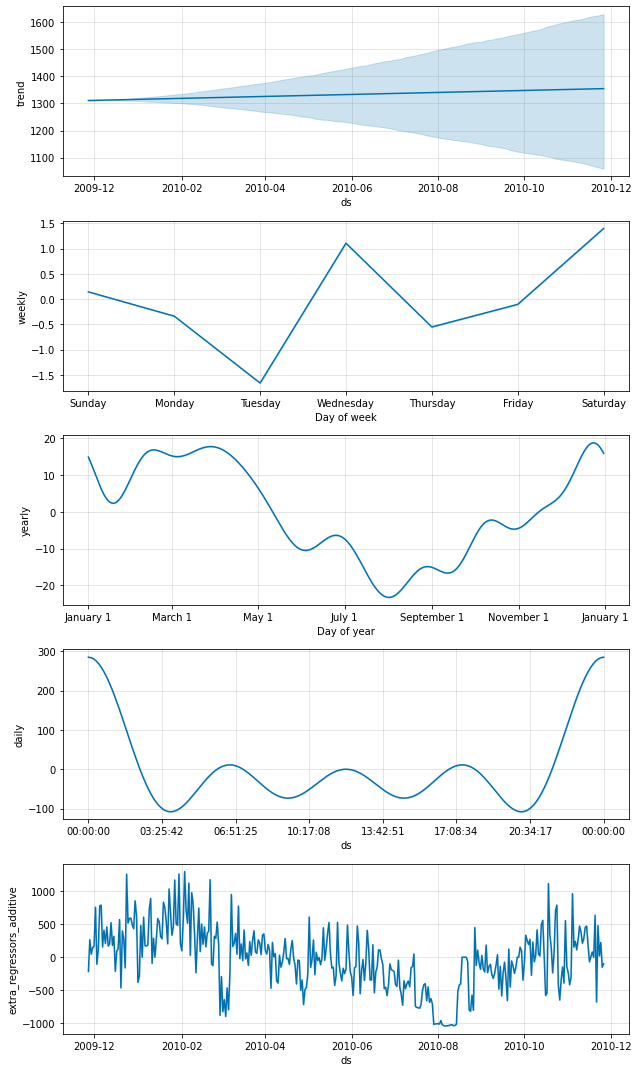

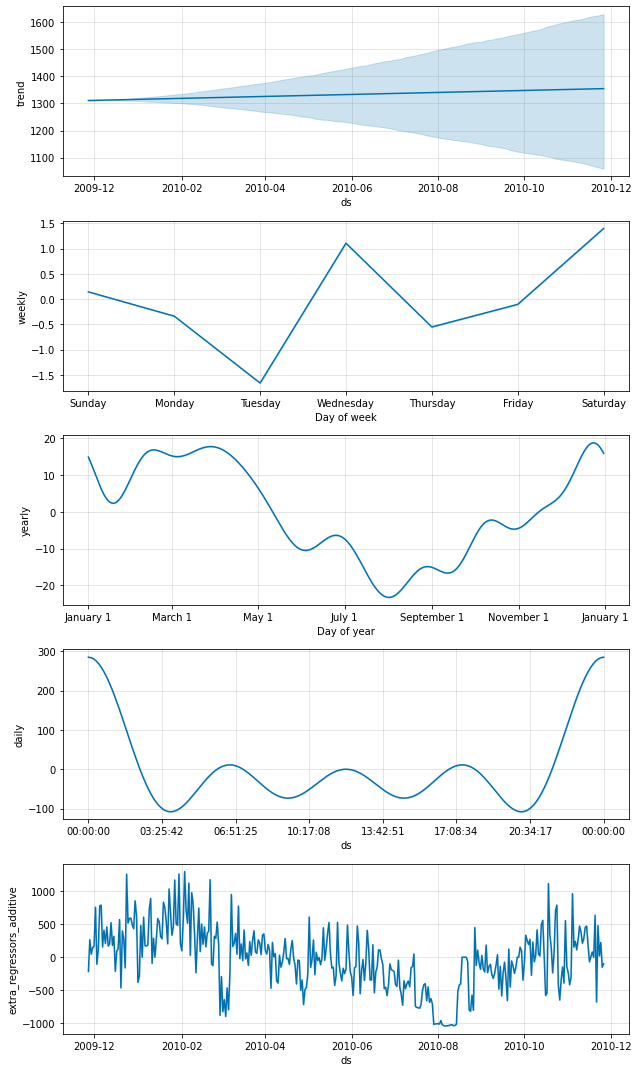

In [76]:
model.plot_components(new_forecast)

**Q20. Sometimes, filling missing values in a time series dataset with the mean can lead to over- or under-variability of the dataset properties. What other missing data imputation method can be used to improve this variability for time series datasets?**
ans - Forward Fill